In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
netflix_df = pd.read_csv("../Netflix_dataset/titles.csv")
netflix_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR'],NaN,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US'],NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG'],NaN,tt14922926,5.2,18.0,1.357,4.000


### Description이 없는 행 제거

In [3]:
# 디스크립션이 없는 행 제거
netflix_df = netflix_df.dropna(subset=['description'])

In [4]:
# 디스크립션 리스트 생성
corpus = netflix_df['description'].tolist()
# corpus

In [5]:
# CountVectorizer 인스턴스 생성
vector = CountVectorizer(stop_words="english")
vector

CountVectorizer(stop_words='english')

In [6]:
# Bag of Words 벡터화
print(vector.fit_transform(corpus).toarray())
print("총 영상 개수: ", len(vector.fit_transform(corpus).toarray()))
print("총 등장 단어 개수", len(vector.fit_transform(corpus).toarray()[0]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
총 영상 개수:  6114
총 등장 단어 개수 21089


In [7]:
# 단어 딕셔너리
# print("vocabulary: ", vector.vocabulary_)

In [8]:
len(vector.vocabulary_)

21089

In [9]:
# 딕셔너리 value를 기준으로 정렬 (인덱스를 기준으로)
sorted_dict = dict(sorted(vector.vocabulary_.items(), key=lambda x: x[1]))
# sorted_dict

In [12]:
# 군집화를 위해 행렬 생성

labels = netflix_df['id'].tolist()
print("총 영상 개수", len(labels))

col = sorted_dict.keys()
#labels


총 영상 개수 6114


In [13]:
# 거리 행렬 생성

dist_df = pd.DataFrame(vector.fit_transform(corpus).toarray(), columns=col, index=labels)
dist_df

,00,000,0093,05,10,100,1001,100th,101,102,...,يحاولن,يرفض,يرفضن,يقيمن,आव,गल,ガチ,ベイブレードバーストgt,非天夜翔,麻婆斗妇
ts300399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm82169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm17823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm191099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm69975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tm1303784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm1260999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm1310286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm1072700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 거리 행렬 생성 (좀 오래 걸림..)

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(dist_df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ts300399,tm82169,tm17823,tm191099,tm69975,tm127384,tm17249,ts22164,tm70993,tm16479,...,tm1298826,tm1307029,tm1304174,tm1299701,tm1315251,tm1303784,tm1260999,tm1310286,tm1072700,tm561709
ts300399,0.000000,6.708204,5.744563,5.744563,7.000000,9.273618,5.291503,5.477226,7.874008,5.567764,...,5.196152,5.196152,6.000000,4.795832,5.291503,5.196152,10.862780,5.567764,4.690416,6.708204
tm82169,6.708204,0.000000,7.211103,7.071068,7.348469,10.246951,6.855655,7.000000,9.000000,7.211103,...,6.782330,6.782330,7.416198,6.480741,6.708204,6.782330,11.704700,7.071068,6.403124,8.000000
tm17823,5.744563,7.211103,0.000000,6.164414,7.348469,9.433981,5.744563,5.916080,8.185353,6.164414,...,5.656854,5.477226,6.403124,5.291503,5.744563,5.656854,11.090537,6.000000,5.196152,6.928203
tm191099,5.744563,7.071068,6.164414,0.000000,7.211103,9.539392,5.744563,5.916080,8.062258,6.000000,...,5.656854,5.656854,6.244998,5.291503,5.744563,5.656854,11.090537,6.000000,5.000000,6.928203
tm69975,7.000000,7.348469,7.348469,7.211103,0.000000,10.246951,7.000000,7.141428,8.888194,7.348469,...,6.928203,6.928203,7.416198,6.633250,7.000000,6.928203,11.618950,7.211103,6.557439,8.124038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tm1303784,5.196152,6.782330,5.656854,5.656854,6.928203,9.219544,5.196152,5.385165,7.681146,5.656854,...,5.099020,5.099020,5.744563,4.690416,5.196152,0.000000,10.723805,5.477226,4.582576,6.480741
tm1260999,10.862780,11.704700,11.090537,11.090537,11.618950,13.190906,10.862780,10.954451,12.083046,11.090537,...,10.816654,10.816654,11.135529,10.630146,10.770330,10.723805,0.000000,10.908712,10.583005,11.445523
tm1310286,5.567764,7.071068,6.000000,6.000000,7.211103,9.433981,5.567764,5.567764,8.062258,6.000000,...,5.477226,5.477226,6.244998,5.099020,5.385165,5.477226,10.908712,0.000000,5.000000,6.928203
tm1072700,4.690416,6.403124,5.196152,5.000000,6.557439,8.944272,4.690416,4.898979,7.211103,5.196152,...,4.582576,4.582576,5.291503,4.123106,4.690416,4.582576,10.583005,5.000000,0.000000,6.244998


In [15]:

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(dist_df, metric='euclidean'), method='complete')

pd.DataFrame(row_clusters,
             columns=['row label 1', 
                      'row label 2',
                      'distance', 
                      'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,5546.0,5787.0,0.000000,2.0
cluster 2,3493.0,5792.0,0.000000,2.0
cluster 3,5471.0,6114.0,1.000000,3.0
cluster 4,1123.0,1193.0,1.414214,2.0
cluster 5,1396.0,3503.0,1.732051,2.0
...,...,...,...,...
cluster 6109,453.0,526.0,20.542639,2.0
cluster 6110,12221.0,12222.0,20.591260,6108.0
cluster 6111,12215.0,12223.0,21.563859,6112.0
cluster 6112,3413.0,12224.0,22.271057,6113.0


In [16]:
row_clusters

array([[5.54600000e+03, 5.78700000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.49300000e+03, 5.79200000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.47100000e+03, 6.11400000e+03, 1.00000000e+00, 3.00000000e+00],
       ...,
       [1.22150000e+04, 1.22230000e+04, 2.15638587e+01, 6.11200000e+03],
       [3.41300000e+03, 1.22240000e+04, 2.22710575e+01, 6.11300000e+03],
       [3.43000000e+02, 1.22250000e+04, 2.63438797e+01, 6.11400000e+03]])

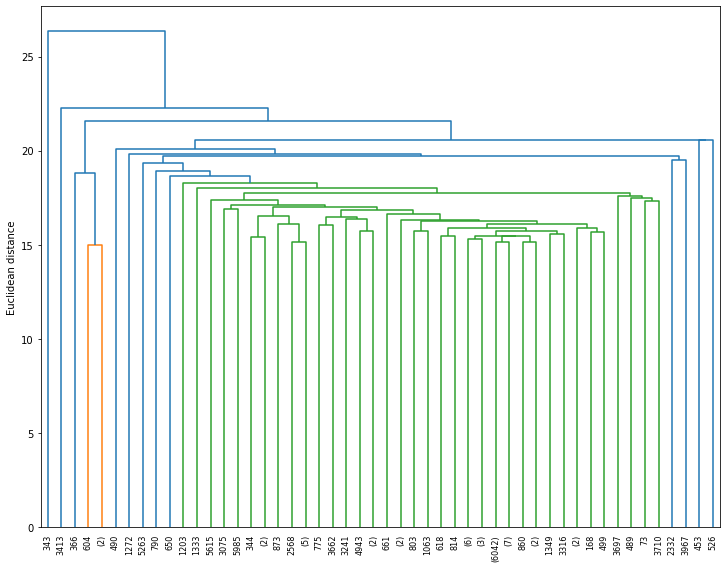

In [17]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# 검은색 덴드로그램 만들기 (1/2 부분만)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

plt.figure(figsize=(10, 8))

dendrogram = sch.dendrogram(row_clusters, truncate_mode='lastp', p=50)
# row_dendr = dendrogram(row_clusters, 
#                        labels=labels,
#                        # make dendrogram black (part 2/2)
#                        # color_threshold=np.inf
#                        )

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()